In [9]:
num_plots = 1280

num_plants = num_plots * 5

num_plants

import matplotlib.pyplot as plt

num_plants

6400

In [ ]:
# plotting

import glob
import pandas as pd
import os
import matplotlib.figure as fig

# Define steps
x = .1
y = 1
n = 200
step = (y - x) / (n - 1)

frames = [x + step * i for i in range(n)]

for i in glob.glob('/home/travis_s/data/season_12/season12_plant_detection/*.csv'):
    df = pd.read_csv(i)
    df['pred_conf'] = df['pred_conf'].astype(float)
    scan_date = os.path.basename(i)[:10]
    num_observations = []
    print(i)
    for x in frames:
        filtered_df = df[df['pred_conf']>float(x)]
        print(len(filtered_df))
        num_observations.append(len(filtered_df))
        # print(num_observations)
        # if len(filtered_df)<4000:
        #     break

  
    fig = plt.figure(figsize=(20, 8), dpi = (600))
    plt.plot(frames[:len(num_observations)], num_observations)
    plt.xlabel('conf threshold') 
    plt.ylabel('number of plants')
    plt.title(scan_date)
    plt.locator_params(axis="x", nbins=15)
    plt.locator_params(axis="y", nbins=15)
    # plt.show()
    # fig.Figure.set_size_inches(18.5, 10.5)
    
# plt.savefig(f'./conf_plots/overlayed.jpg')
    # plt.close()



In [16]:
# recording

import glob
import pandas as pd
import os
import matplotlib.figure as fig

# Define steps
x = .1
y = 1
n = 200
step = (y - x) / (n - 1)

frames = [x + step * i for i in range(n)]
final_df = pd.DataFrame()
for i in glob.glob('/home/travis_s/data/season_12/season12_plant_detection/*.csv'):
    df = pd.read_csv(i)
    df['pred_conf'] = df['pred_conf'].astype(float)
    scan_date = os.path.basename(i)[:10]
    num_observations = []
    print(i)

    temp_df = pd.DataFrame()
    for x in frames:
        filtered_df = df[df['pred_conf']>float(x)]
        # print(len(filtered_df))
        num_observations.append(len(filtered_df))
    
    
    temp_df['num_observations'] = num_observations
    temp_df['pred_conf_thresh'] = frames[:len(num_observations)]
    temp_df['date'] = scan_date

    final_df = final_df.append(temp_df[(temp_df['num_observations'] >= 5400) & (temp_df['num_observations'] <= 7400)])




    


/home/travis_s/data/season_12/season12_plant_detection/2021-05-24__11-24-18-691_sorghum_detection.csv
/home/travis_s/data/season_12/season12_plant_detection/2021-05-27__11-15-48-347_sorghum_detection.csv
/home/travis_s/data/season_12/season12_plant_detection/2021-06-01__13-35-09-588_sorghum_detection.csv
/home/travis_s/data/season_12/season12_plant_detection/2021-06-03__13-10-35-405_sorghum_detection.csv
/home/travis_s/data/season_12/season12_plant_detection/2021-06-10__11-51-08-761_sorghum_detection.csv
/home/travis_s/data/season_12/season12_plant_detection/2021-06-17__11-53-33-303_sorghum_detection.csv
/home/travis_s/data/season_12/season12_plant_detection/2021-06-21__11-18-51-429_sorghum_detection.csv
/home/travis_s/data/season_12/season12_plant_detection/2021-06-28__13-01-20-180_sorghum_detection.csv
/home/travis_s/data/season_12/season12_plant_detection/2021-07-01__11-27-27-947_sorghum_detection.csv
/home/travis_s/data/season_12/season12_plant_detection/2021-07-05__09-30-37-389_so

<AxesSubplot:title={'center':'pred_conf_thresh'}, xlabel='date'>

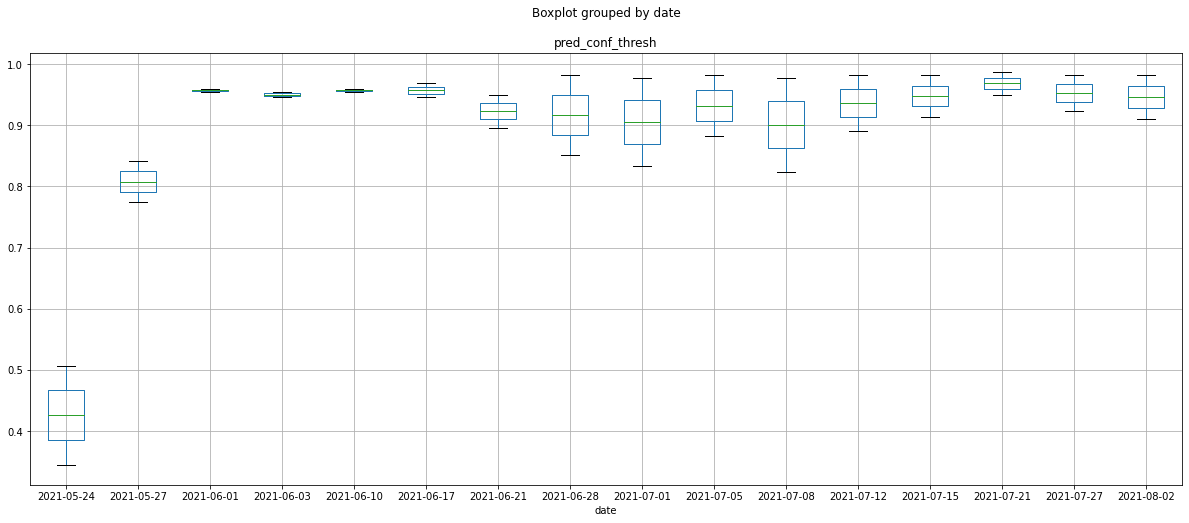

In [21]:
final_df.boxplot(column = 'pred_conf_thresh', by= 'date', figsize= (20,8))